In [1]:
from collections import OrderedDict
from copy import copy
import single_sided_network
import qdyn_model
from notebook_plots import display_hamiltonian
from sympy import Symbol
import QDYN
from QDYN.pulse import blackman
from QDYN.shutil import mkdir

## Circuit

In [2]:
circuit = single_sided_network.network_circuit(n_nodes=2, topology='open')

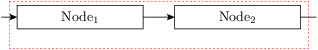

In [3]:
circuit.show()

In [4]:
slh = single_sided_network.network_slh(n_cavity=5, n_nodes=2, topology='open')

In [5]:
slh.S

[[1]]

In [6]:
slh.L

[[√2⋅√κ * â^(c₁) + √2⋅√κ * â^(c₂)]]

In [7]:
display_hamiltonian(slh.H)

<IPython.core.display.Latex object>

## Numerical Values

In [8]:
controls = sorted([sym for sym in slh.H.all_symbols() if sym.name.startswith('Omega')], key=str)

In [9]:
# from algebra import generate_num_vals_code
# generate_num_vals_code(slh.all_symbols())

In [10]:
Delta =  5000.0  # MHz
g     =    50.0  # MHz
kappa =     0.5  # MHz
E0    =    70.0  # MHz
t0    = -4    # microsec
T     =  4    # microsec
nt    = 2001
num_vals = {
    Symbol('Delta_1', real=True):   Delta,
    Symbol('Delta_2', real=True):   Delta,
    Symbol('g_2', positive=True):   g,
    Symbol('g_1', positive=True):   g,
    Symbol('kappa', positive=True): kappa,
}

## Time Grid and Guess Pulse

In [11]:
tgrid = QDYN.pulse.pulse_tgrid(t0=t0, T=T, nt=nt) # microsec

In [12]:
p = QDYN.pulse.Pulse(
    tgrid, amplitude=(E0 * blackman(tgrid, t0, T)),
    time_unit='microsec', ampl_unit='MHz')

In [13]:
controls = OrderedDict([
    (Symbol('Omega_1'), p.copy()),
    (Symbol('Omega_2'), p.copy()),
])

## OCT for forward transfer

In [14]:
model = qdyn_model.make_qdyn_oct_model(
    slh, num_vals, controls, energy_unit='MHz',
    mcwf=False, non_herm=False, oct_target='excitation_transfer_fw')

In [15]:
mkdir("./NO_FB/fw_oct001/")

In [16]:
model.write_to_runfolder("./NO_FB/fw_oct001/")